<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,82.841954,89.406306,0.001829,182.250089,182.249370,0.000719
1,0.0,1.0,24.759322,44.959668,0.001998,79.720988,79.717107,0.003881
2,0.0,2.0,49.934031,45.931100,0.002220,105.867351,105.864182,0.003169
3,0.0,3.0,94.889216,36.438647,0.003804,141.331667,141.328358,0.003309
4,0.0,4.0,63.071525,61.183833,0.000949,134.256306,134.255188,0.001118
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,31.352028,65.046823,0.001562,106.400413,106.398851,0.001563
119996,999.0,116.0,74.248138,28.676273,-0.008716,112.915695,112.924683,-0.008987
119997,999.0,117.0,41.318671,60.062738,0.000991,111.382400,111.381453,0.000947
119998,999.0,118.0,48.612154,76.219138,0.000144,134.831435,134.831263,0.000173


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    82.841954  89.406306  0.001829  182.250089  182.249370  0.000719
      1.0    24.759322  44.959668  0.001998   79.720988   79.717107  0.003881
      2.0    49.934031  45.931100  0.002220  105.867351  105.864182  0.003169
      3.0    94.889216  36.438647  0.003804  141.331667  141.328358  0.003309
      4.0    63.071525  61.183833  0.000949  134.256306  134.255188  0.001118
...                ...        ...       ...         ...         ...       ...
999.0 115.0  31.352028  65.046823  0.001562  106.400413  106.398851  0.001563
      116.0  74.248138  28.676273 -0.008716  112.915695  112.924683 -0.008987
      117.0  41.318671  60.062738  0.000991  111.382400  111.381453  0.000947
      118.0  48.612154  76.219138  0.000144  134.831435  134.831263  0.000173
      119.0  39.918604  91.272787 -0.000104  141.191288  141.191266  0.000022

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    82.841954  89.406306  0.001829  182.250089  182.249370  0.000719
      1.0    24.759322  44.959668  0.001998   79.720988   79.717107  0.003881
      2.0    49.934031  45.931100  0.002220  105.867351  105.864182  0.003169
      3.0    94.889216  36.438647  0.003804  141.331667  141.328358  0.003309
      4.0    63.071525  61.183833  0.000949  134.256306  134.255188  0.001118
...                ...        ...       ...         ...         ...       ...
999.0 115.0  31.352028  65.046823  0.001562  106.400413  106.398851  0.001563
      116.0  74.248138  28.676273 -0.008716  112.915695  112.924683 -0.008987
      117.0  41.318671  60.062738  0.000991  111.382400  111.381453  0.000947
      118.0  48.612154  76.219138  0.000144  134.831435  134.831263  0.000173
      119.0  39.918604  91.272787 -0.000104  141.191288  141.191266  0.000022

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,82.841954,89.406306,0.001829,182.250089,182.249370,0.000719
1,0.0,1.0,24.759322,44.959668,0.001998,79.720988,79.717107,0.003881
2,0.0,2.0,49.934031,45.931100,0.002220,105.867351,105.864182,0.003169
3,0.0,3.0,94.889216,36.438647,0.003804,141.331667,141.328358,0.003309
4,0.0,4.0,63.071525,61.183833,0.000949,134.256306,134.255188,0.001118
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,31.352028,65.046823,0.001562,106.400413,106.398851,0.001563
119996,999.0,116.0,74.248138,28.676273,-0.008716,112.915695,112.924683,-0.008987
119997,999.0,117.0,41.318671,60.062738,0.000991,111.382400,111.381453,0.000947
119998,999.0,118.0,48.612154,76.219138,0.000144,134.831435,134.831263,0.000173


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    82.841954  89.406306  0.001829  182.250089  182.249370  0.000719
      1.0    24.759322  44.959668  0.001998   79.720988   79.717107  0.003881
      2.0    49.934031  45.931100  0.002220  105.867351  105.864182  0.003169
      3.0    94.889216  36.438647  0.003804  141.331667  141.328358  0.003309
      4.0    63.071525  61.183833  0.000949  134.256306  134.255188  0.001118
...                ...        ...       ...         ...         ...       ...
999.0 115.0  31.352028  65.046823  0.001562  106.400413  106.398851  0.001563
      116.0  74.248138  28.676273 -0.008716  112.915695  112.924683 -0.008987
      117.0  41.318671  60.062738  0.000991  111.382400  111.381453  0.000947
      118.0  48.612154  76.219138  0.000144  134.831435  134.831263  0.000173
      119.0  39.918604  91.272787 -0.000104  141.191288  141.191266  0.000022

[120000 rows x 6 columns]

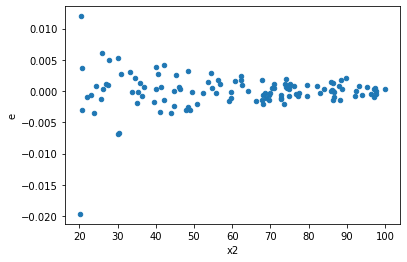

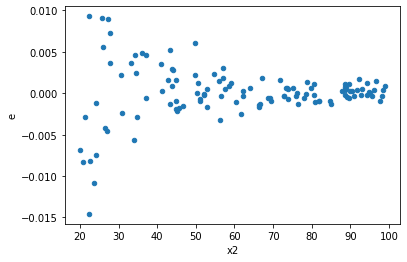

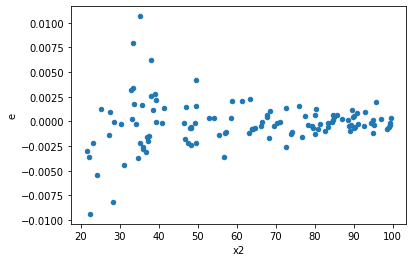

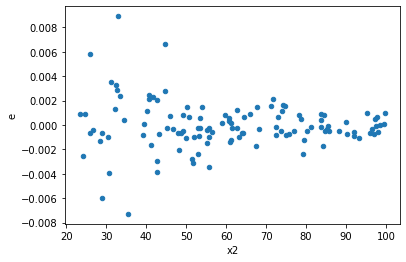

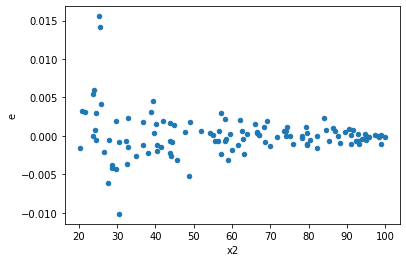

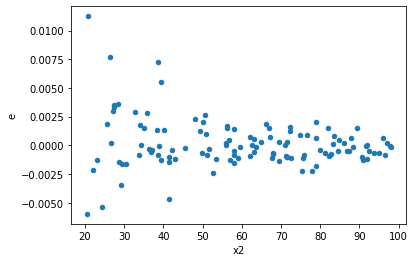

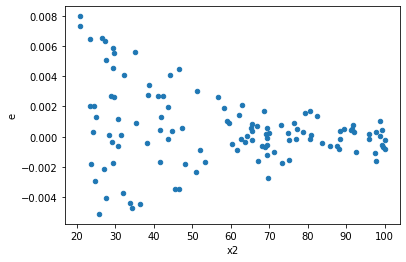

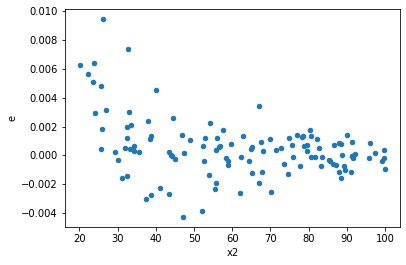

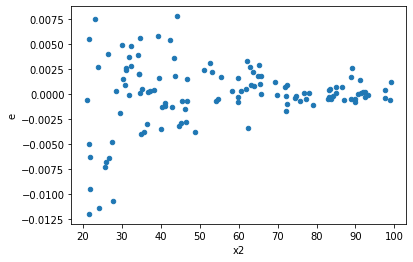

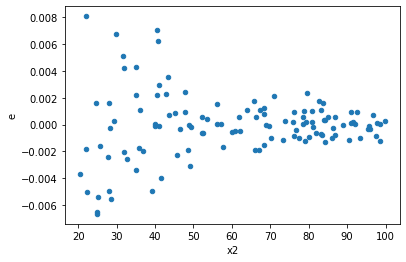

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
7.0,62.0,54.0,7.424916775088535e-05,0.0006078364350841242,1.1975672217884735e-06,1.1256230279335633e-05,9.39924713581032,2.55351295663786e-14,0.9999999999999872,1.27675647831893e-14,Reject005=0 : Heteroscedasticity
11.0,57.0,59.0,4.355727102818356e-05,0.0012089800916494963,7.641626496172555e-07,2.0491187994059258e-05,26.815217943879663,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
14.0,55.0,61.0,4.166813933187989e-05,0.0008522495235237861,7.576025333069071e-07,1.3971303664324362e-05,18.441469042269617,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
15.0,59.0,57.0,0.00017102249463157463,0.00036104317657667713,2.898686349687706e-06,6.334090817134687e-06,2.185159086914353,0.0035094603739698194,0.9982452698130151,0.0017547301869849097,Reject005=0 : Heteroscedasticity
16.0,62.0,54.0,5.4909615348477575e-05,0.0005836495037327456,8.856389572335093e-07,1.0808324143198992e-05,12.203984541241503,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
17.0,49.0,67.0,0.00010513741038149081,0.0003255689042571076,2.1456614363569553e-06,4.859237376971755e-06,2.2646803892892287,0.001947254541022847,0.9990263727294886,0.0009736272705114235,Reject005=0 : Heteroscedasticity
18.0,53.0,63.0,6.997610333546429e-05,0.0011300999751228816,1.320303836518194e-06,1.7938094843220344e-05,13.586338498057643,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
21.0,54.0,62.0,2.9127145456694643e-05,0.0006685020564740748,5.393915825313822e-07,1.078229123345282e-05,19.989728395187733,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
22.0,63.0,53.0,0.00017153436868074431,0.00037249027277541234,2.7227677568372115e-06,7.028118354253063e-06,2.5812404809791714,0.0005278759738143179,0.9997360620130928,0.00026393798690715897,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,62.0,54.0,0.0007099080219559044,0.00018746145012080354,1.1450129386385555e-05,3.471508335570436e-06,0.30318507489514773,8.453438528909663e-06,Reject005=0 : Heteroscedasticity
1.0,64.0,52.0,0.0006016648844643281,0.00031338808176869447,9.401013819755126e-06,6.026693880167201e-06,0.6410685055587102,0.09067854238308581,Reject005=1 : Homoscedasticity
2.0,58.0,58.0,0.0007116244367600201,5.3437216279219045e-05,1.2269386840690002e-05,9.213313151589491e-07,0.07509187925377496,1.2861355987389146e-18,Reject005=0 : Heteroscedasticity
3.0,65.0,51.0,0.0005971908789143279,0.00031705655736517265,9.187551983297353e-06,6.216795242454365e-06,0.6766541570329377,0.13683391717081594,Reject005=1 : Homoscedasticity
4.0,74.0,42.0,0.0008287419625534534,2.776137698815502e-05,1.1199215710181804e-05,6.609851663846433e-07,0.05902066568676827,3.87048609152472e-24,Reject005=0 : Heteroscedasticity
5.0,69.0,47.0,0.00038264713841248054,0.00022470669985424728,5.545610701630153e-06,4.780993613920155e-06,0.8621221126313038,0.5676221973451019,Reject005=1 : Homoscedasticity
6.0,61.0,55.0,0.0007674424428054282,4.4417943268702925e-05,1.2581023652548003e-05,8.075989685218714e-07,0.064191832940264,5.568439849455611e-21,Reject005=0 : Heteroscedasticity
7.0,62.0,54.0,7.424916775088535e-05,0.0006078364350841242,1.1975672217884735e-06,1.1256230279335633e-05,9.39924713581032,2.55351295663786e-14,Reject005=0 : Heteroscedasticity
8.0,52.0,64.0,0.00045999857803747486,0.00021837367502102926,8.84612650072067e-06,3.412088672203582e-06,0.3857155639731818,0.0005292817457754314,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    762
Reject005=1 : Homoscedasticity      238
Name: Result_test, dtype: int64